# Поврзи 4 (целосно од аудиториски вежби)

Забелешка за броењето јазлиЧ

    Минимакс е рекурзивен алгоритам, значи тој доколку не работи со алфа бета потскратување, доколку се наогја токму на коренот на дрвото че ги разгрании јазлите до долу.

Потоа мин е на ред и го прави истото. Разгранетите состојби не се чуваат никаде во меморијата, па затоа на компјутерот му е неопходно да ги разгранува сите, односно целото дрво.
Доколку има алфа бета потскратување ќе се разгранат јазлите кои не можат да се скратат. Постои и пристам со кој се огрничува длабочината на пребарување, доносно колку длабоко
по дрвото би истражувал минимакс (тоа најчесто се прави кај огромни дрва). Алогирмот е направен така да се брои секој јазол што се разгранува во секој рекурзивен повик, бидејќи 
компјутерот нема информација за разгранувањето што се случувало пред него.

In [17]:
from plotly import graph_objects as go
import ipywidgets as widgets
from collections import deque
from copy import deepcopy

In [18]:
node_count=0

In [19]:
def add_circle(y):
    for i in range(M-1,-1,-1):
        if TABLE[i][y] == None:
            break
    return i, y 
def game_end(board):
    if abs(board.x_check()) == 1000:
        return "Blue" if board.x_check() == 1000 else "Red"
    if abs(board.y_check()) == 1000:
        return "Blue" if board.y_check() == 1000 else "Red"
    if abs(board.diag_check()) == 1000:
        return "Blue" if board.diag_check() == 1000 else "Red"
    if abs(board.diag_check(False)) == 1000:
        return "Blue" if board.diag_check(False) == 1000 else "Red"
    return None

In [20]:
def minimax(depth, board, player, node_count=0):
    if depth == 0:
        return board.score(), node_count

    moves = board.available_moves()
    if player:
        bestMove = -9999
        for move in moves:
            board.push(move)
            value, node_count = minimax(depth - 1, board, not player, node_count + 1)
            bestMove = max(bestMove, value)
            board.pop()
        return bestMove, node_count
    else:
        bestMove = 9999
        for move in moves:
            board.push(move)
            value, node_count = minimax(depth - 1, board, not player, node_count + 1)
            bestMove = min(bestMove, value)
            board.pop()
        return bestMove, node_count

def minimaxRoot(depth, board, player):
    moves = board.available_moves()
    scores = {}
    bestMove = -9999 if player else 9999
    node_count = 0

    for move in moves:
        board.push(move)
        value, node_count = minimax(depth - 1, board, not player, node_count + 1)
        scores[move] = value
        board.pop()
        if player and value >= bestMove:
            bestMove = value
            bestMoveFound = move
        elif not player and value <= bestMove:
            bestMove = value
            bestMoveFound = move

    return bestMoveFound, moves, scores, node_count




In [21]:
def minimaxAlphaBeta(depth, board, alpha, beta, player, node_count=0):
    if depth == 0:
        return board.score(), node_count

    moves = board.available_moves()
    if player:
        bestMove = -9999
        for move in moves:
            board.push(move)
            value, node_count = minimaxAlphaBeta(depth - 1, board, alpha, beta, not player, node_count + 1)
            bestMove = max(bestMove, value)
            board.pop()
            alpha = max(alpha, bestMove)
            if beta <= alpha:
                break
        return bestMove, node_count
    else:
        bestMove = 9999
        for move in moves:
            board.push(move)
            value, node_count = minimaxAlphaBeta(depth - 1, board, alpha, beta, not player, node_count + 1)
            bestMove = min(bestMove, value)
            board.pop()
            beta = min(beta, bestMove)
            if beta <= alpha:
                break
        return bestMove, node_count

def minimaxAlphaBetaRoot(depth, board, player):
    moves = board.available_moves()
    scores = {}
    bestMove = -9999 if player else 9999
    alpha = -10000
    beta = 10000
    node_count = 0

    for move in moves:
        board.push(move)
        value, node_count = minimaxAlphaBeta(depth - 1, board, alpha, beta, not player, node_count + 1)
        scores[move] = value
        board.pop()
        if player and value >= bestMove:
            bestMove = value
            bestMoveFound = move
        elif not player and value <= bestMove:
            bestMove = value
            bestMoveFound = move

    return bestMoveFound, moves, scores, node_count


In [22]:
class Board:
    def __init__(self, table, turn):
        self.table = deepcopy(table)  # Копирање на табелата за да се избегне промена на оригиналната
        self.queue = []  # Иницијализирање на празна листа за движења
        self.turn = turn  # Поставување на чиј е редот (True или False)
        
    def push(self,move):
        self.queue.append(move)  # Додавање на потег во редицата
        self.update_table()  # Ажурирање на табелата според новиот потег
        self.turn = not self.turn  # Промена на редот (од True во False или обратно)
        
    def pop(self):
        move = self.queue.pop()  # Отстранување на последниот потег од редицата
        self.update_table(move)  # Ажурирање на табелата според отстранетиот потег
        self.turn = not self.turn  # Промена на редот
        return move  # Враќање на отстранетиот потег
        
    def peek(self):
        return self.queue[-1]  # Враќање на последниот потег без да се отстрани
    
    def update_table(self,move=None):
        if move != None:
            for x in range(M-1,-1,-1):  # Тргнување од дното кон врвот на табелата
                if self.table[x][move] == None:
                    break  # Прекинување кога ќе се најде празно поле
            if self.table[x][move] != None:
                self.table[x][move] = None  # Отстранување на потегот ако не е празно
            else:
                self.table[x+1][move] = None  # Отстранување на потегот ако е празно
        else:
            y = self.peek()  # Добиј го последниот потег
            for x in range(M-1,-1,-1):
                if self.table[x][y] == None:
                    break
            self.table[x][y] = self.turn  # Поставување на тековниот потег на редот
        
    def available_moves(self):
        moves = []
        for y in range(N):
            if self.table[0][y] == None:
                moves.append(y)  # Додавање на сите можни потези
        return moves
    
    def score(self):
        score = 0
        score += self.x_check()  # Проверка на редиците и додавање на резултатот
        score += self.y_check()  # Проверка на колоните и додавање на резултатот
        score += self.diag_check()  # Проверка на дијагоналите (главни)
        score += self.diag_check(False)  # Проверка на дијагоналите (споредни)
        return score  # Враќање на вкупниот резултат

    def x_check(self):
        score = 0
        prices = [10, 20, 40, 1000]  # Вредности за различни ситуации
        blue, red, blue_start, red_start = -1, -1, -1, -1
        for x in range(M):
            left = 1 + len([y for y in range(N) if self.table[x][y] == None])
            for y in range(N):
                if red == 3:
                    return -1000
                if blue == 3:
                    return 1000
                if self.table[x][y] == True:  # Преод од blue во red
                    blue += 1
                    if blue == 0:
                        blue_start = y
                    if red >= 0:
                        score -= 0 if self.table[x][red_start-1] == True or red_start == 0 else prices[red] / (2 * left)
                        red, red_start = -1, -1
                elif self.table[x][y] == False:  # Преод од red во blue
                    red += 1
                    if red == 0:
                        red_start = y
                    if blue >= 0:
                        score += 0 if self.table[x][blue_start-1] == False or blue_start == 0 else prices[blue] / (2 * left)
                        blue, blue_start = -1, -1
                elif self.table[x][y] == None:  # Преод во празно
                    if blue >= 0:
                        score += prices[blue] / (2 * left) if self.table[x][blue_start-1] == False or blue_start == 0 else prices[blue] / left
                    if red >= 0:
                        score -= prices[red] / (2 * left) if self.table[x][red_start-1] == True or red_start == 0 else prices[red] / left
                    blue, red, blue_start, red_start = -1, -1, -1, -1

            if blue >= 0:  # Проверка на крајот на редицата
                score += 0 if self.table[blue_start-1][y] == False else prices[blue] / (2 * left)
            if red >= 0:
                score -= 0 if self.table[red_start-1][y] == True else prices[red] / (2 * left)
            blue, red, blue_start, red_start = -1, -1, -1, -1
        return score

    def y_check(self):
        score = 0
        prices = [4, 9, 19, 1000]
        blue, red, blue_start, red_start = -1, -1, -1, -1
        for y in range(N):
            left = 1  # Избришан код за должина на редицата
            for x in range(M-1, -1, -1):
                if red == 3:
                    return -1000
                if blue == 3:
                    return 1000
                if self.table[x][y] == True:
                    blue += 1
                    if blue == 0:
                        blue_start = x
                    if red >= 0:
                        red, red_start = -1, -1
                elif self.table[x][y] == False:
                    red += 1
                    if red == 0:
                        red_start = x
                    if blue >= 0:
                        blue, blue_start = -1, -1
                elif self.table[x][y] == None:
                    if blue >= 0:
                        score += prices[blue] / left
                    if red >= 0:
                        score -= prices[red] / left
                    blue, red, blue_start, red_start = -1, -1, -1, -1
            blue, red, blue_start, red_start = -1, -1, -1, -1
        return score

    def diag_check(self, main=True):
        score = 0
        blue, red = -1, -1
        row, col, x, y = 0, 0, 0, 0
        table = self.table[::-1] if main else self.table

        while row + 1 != M or col != N:
            if table[x][y] == True:
                blue += 1
                if red >= 0:
                    red = -1
            elif table[x][y] == False:
                red += 1
                if blue >= 0:
                    blue = -1
            elif table[x][y] == None:
                blue, red = -1, -1

            if red == 3:
                return -1000
            if blue == 3:
                return 1000

            x -= 1
            y += 1
            if x < 0 and row + 1 == M:
                col += 1
                x = row
                y = col
                blue, red = -1, -1
            elif x < 0 and row + 1 < M:
                row += 1
                x = row
                y = col
                blue, red = -1, -1
            elif y > N - 1:
                col += 1
                y = col
                x = row
                blue, red = -1, -1
        return score


In [24]:
turn = True
debug = True
def update_fig(trace, points, selector):
    x, y = add_circle(points.xs[0])
    global turn
    TABLE[x][y] = turn
    turn = not turn
    
    board = Board(TABLE, False)
    y, moves, scores, node_count = minimaxRoot(4, board, False)
    if debug:
        print(f'Node count: {node_count}')
        print([(move, scores[move]) for move in moves])
    x, y = add_circle(y)
    TABLE[x][y] = turn
    turn = not turn
    colors = ['#121212' if n == None else '#1f77b4' if n else '#d62728' for row in TABLE for n in row]
    fig.data[0].marker['color'] = colors
    
    if game_end(Board(TABLE, True)) != None:
        text.value = f'<font size=4> {game_end(Board(TABLE, True))} wins!! Node count {node_count}'
        fig.data[0].on_click(None)

def update_fig_аб(trace, points, selector):
    x, y = add_circle(points.xs[0])
    global turn
    TABLE[x][y] = turn
    turn = not turn
    
    board = Board(TABLE, False)
    y, moves, scores, node_count = minimaxAlphaBetaRoot(4, board, False)
    if debug:
        print(f'Node count: {node_count}')
        print([(move, scores[move]) for move in moves])
    x, y = add_circle(y)
    TABLE[x][y] = turn
    turn = not turn
    colors = ['#121212' if n == None else '#1f77b4' if n else '#d62728' for row in TABLE for n in row]
    fig.data[0].marker['color'] = colors
    
    if game_end(Board(TABLE, True)) != None:
        text.value = f'<font size=4> {game_end(Board(TABLE, True))} wins!! Node count: {node_count}'
        fig.data[0].on_click(None)


def create_fig():
    fig = go.FigureWidget()
    x = [x for y in range(M) for x in range(N)]
    y = [y for y in range(M) for x in range(N)]
    colors = ['#121212' if n == None else '#1f77b4' if n else '#d62728' for row in TABLE for n in row]
    fig.add_scatter(x=x, y=y, mode='markers', marker_size=48, 
        marker_symbol='circle', marker_color=colors,hoverinfo='none')
    fig.data[0].on_click(update_fig)
    fig.update_xaxes(range=[-0.5, N - 0.5], dtick=1, side='top', visible=False,autorange=False)
    fig.update_yaxes(range=[-0.5, M - 0.5], dtick=1, autorange='reversed', visible=False)
    fig.update_layout(width=80*N, height=80*N, showlegend=False,margin={'r':0,'l':0,'t':0,'b':0},plot_bgcolor='#212121')

    return fig

N = 7
M = 6
TABLE = [
    [None, None, None, None, None, None, None],
    [None, None, None, None, None, None, None],
    [None, None, None, None, None, None, None],
    [None, None, None, None, None, None, None],
    [None, None, None, None, None, None, None],
    [None, None, None, None, None, None, None],
]
fig = create_fig()
text = widgets.HTML(value='<font size=4> Connect 4')
widgets.VBox([fig,text])

    'data': [{'hoverinfo': 'none',
              'marker': {'color': [#121212, #…

# Crtanje Drvo 

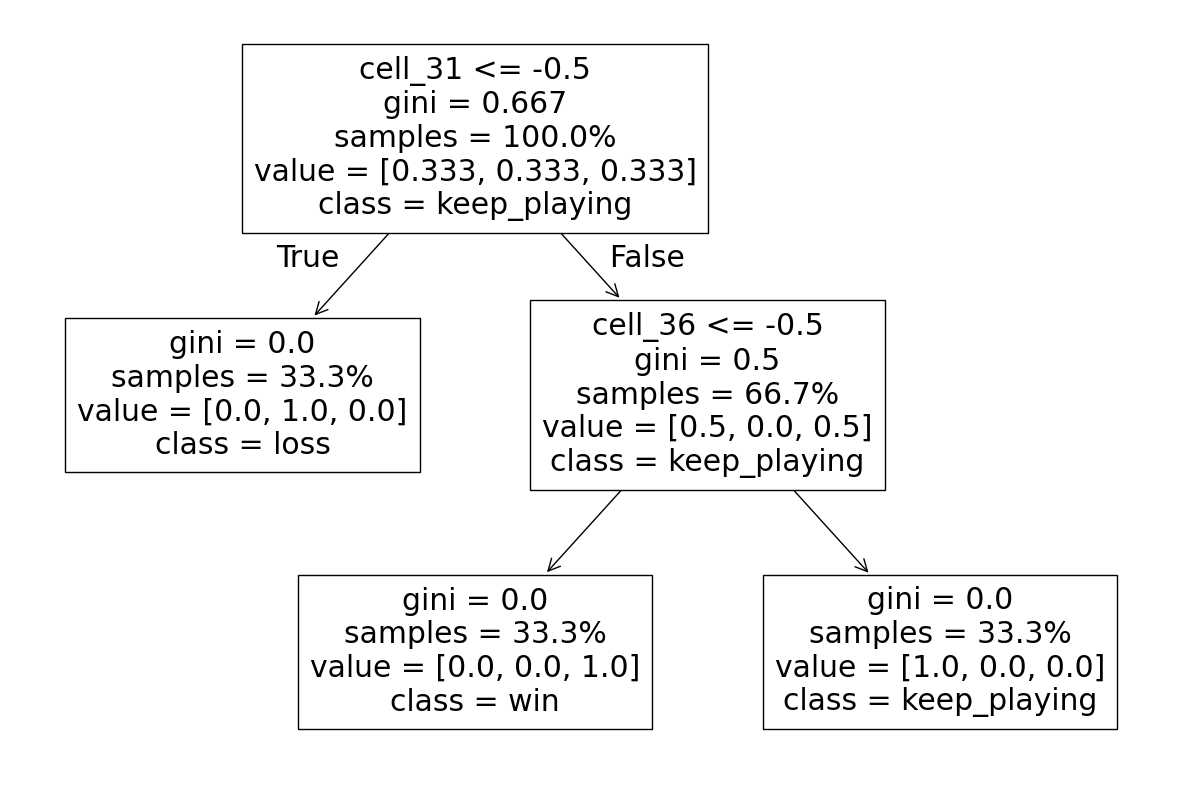

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Example Connect 4 board states (6x7)
X_connect4 = [
    [
        ['.', '.', '.', '.', '.', '.', '.'],  # Row 0
        ['.', '.', '.', '.', '.', '.', '.'],  # Row 1
        ['.', '.', '.', '.', '.', '.', '.'],  # Row 2
        ['.', '.', '.', 'W', '.', '.', '.'],  # Row 3
        ['.', '.', 'B', 'W', '.', '.', '.'],  # Row 4
        ['W', 'B', 'B', 'W', '.', '.', '.'],  # Row 5
    ],  # Example state
    [
        ['.', '.', '.', '.', '.', '.', '.'],
        ['.', '.', '.', '.', '.', '.', '.'],
        ['.', '.', '.', '.', '.', '.', '.'],
        ['.', '.', '.', 'B', '.', '.', '.'],
        ['.', '.', 'W', 'B', '.', '.', '.'],
        ['W', 'W', 'B', 'B', '.', '.', '.'],
    ],  # Another state
    [
        ['.', '.', '.', '.', '.', '.', '.'],
        ['.', '.', '.', '.', '.', '.', '.'],
        ['.', '.', '.', '.', '.', '.', '.'],
        ['.', '.', '.', '.', '.', '.', '.'],
        ['.', '.', '.', '.', '.', '.', '.'],
        ['.', '.', '.', '.', '.', '.', '.'],
    ],  # Initial empty state
]

# Labels for the states
y_connect4 = ['win', 'loss', 'keep_playing']  # Adjust labels as needed

# Encode the board
def encode_board(board):
    return [1 if cell == 'W' else -1 if cell == 'B' else 0 for row in board for cell in row]

X_numeric_connect4 = [encode_board(board) for board in X_connect4]

# Train the classifier
clf_connect4 = DecisionTreeClassifier()
clf_connect4.fit(X_numeric_connect4, y_connect4)

# Visualize the tree
plt.figure(figsize=(15, 10))
tree.plot_tree(
    clf_connect4,
    feature_names=[f"cell_{i}" for i in range(42)],  # Adjust feature names for 6x7 board
    class_names=clf_connect4.classes_,
    proportion=True
)
plt.show()
